# Statistics Exercise 4: Linear Regression

In this exercise, we will apply our linear regression skills on a few artificial datasets.

It is recommended to use [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for this question.

## Part 1: Adding Noise

**Questions:**
1. Sample 1000 data points (x) from a uniform distribution over $(1,10)$. (Hint: use np.random.uniform.)
2. Sample noise $n$ from $\mathcal{N}(0, 100)$ ($\sigma^2 = 100$) for each data point. 
Define $y = 5x + 2$ and plot $y’=y + n$ with plt.scatter(..., alpha=0.2). 
(Hint: Use np.random.normal, and be careful not to confuse variance and standard deviation.)
3. Perform linear regression to generate $\hat{y}$, an approximation of $y$, using $x$ and $y'$. Plot $\hat{y}$ on top of the plot from question 2.
4. What is the equation for the regression line (to two decimal places)? (See .coef_ and .intercept_ attributes in LinearRegression.) The result should be close to, but not equal to, the line from question 1.
5. Compute the $R^2$ score using LinearRegression.score().
6. If we instead sampled noise $n$ from $\mathcal{N}(0, 36)$ in question 2, what $R^2$ score would we get? Why?

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
%matplotlib notebook

In [3]:
# 1.Sample 1000 data points (x) from a uniform distribution over  (1,10) . 
# (Hint: use np.random.uniform.)
x = np.random.uniform(1,10,1000)
x

array([5.78195937, 8.84149222, 9.45051133, 1.11361122, 6.244275  ,
       7.18735996, 6.11797976, 1.17776736, 1.94180002, 4.44338754,
       6.8261961 , 3.59381877, 8.62571785, 3.39238403, 3.75596651,
       9.87097492, 9.37326604, 5.72124292, 5.70238806, 4.11980375,
       5.24199519, 9.12450099, 3.2094363 , 6.75615881, 3.39018165,
       5.96585614, 7.43048618, 2.31330697, 5.15196541, 2.32110287,
       6.4869863 , 5.73766232, 7.34949457, 7.22267547, 1.19663767,
       8.11947666, 7.50113307, 5.56435022, 1.06102207, 2.5998838 ,
       2.50498903, 4.50699983, 1.5155293 , 8.41236437, 2.73343362,
       6.76803304, 9.5172713 , 9.87914581, 1.81353982, 3.39636541,
       7.06997783, 6.47933693, 8.77267562, 2.97719086, 5.52844612,
       4.54176729, 3.83230631, 7.79148686, 6.75226779, 7.15795037,
       4.79151826, 6.20189051, 8.16945274, 3.29156196, 2.20274705,
       6.70446295, 2.73889984, 2.18197262, 6.34565665, 5.46059887,
       5.43842043, 3.12654332, 2.69107388, 2.75513888, 7.67586

<IPython.core.display.Javascript object>


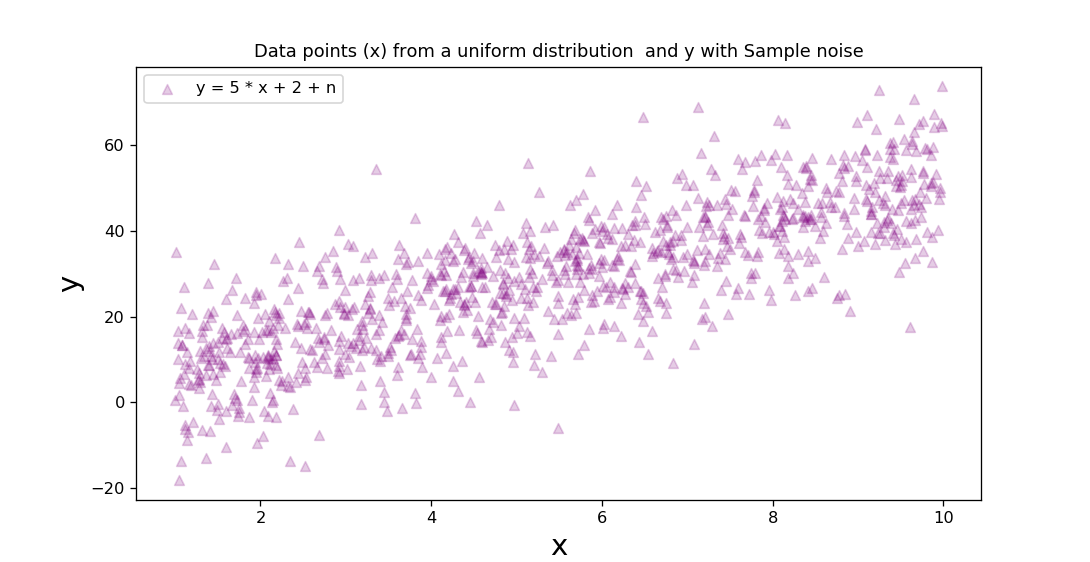

In [4]:
%matplotlib notebook
# 2.Sample noise  𝑛  from  N(0,100)  ( 𝜎2=100 ) for each data point. 
n = np.random.normal(0,10,len(x))

# Define  𝑦=5𝑥+2  and plot  𝑦′=𝑦+𝑛  with plt.scatter(..., alpha=0.2). 
# (Hint: Use np.random.normal, and be careful not to confuse variance and standard deviation.)

y = 5 * x + 2 + n

f = plt.figure()
plt.scatter(x,y,marker='^',color='purple',label='y = 5 * x + 2 + n', alpha=0.2)
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.legend(loc="upper left")
plt.title("Data points (x) from a uniform distribution  and y with Sample noise", fontsize=11)
plt.show()

<IPython.core.display.Javascript object>


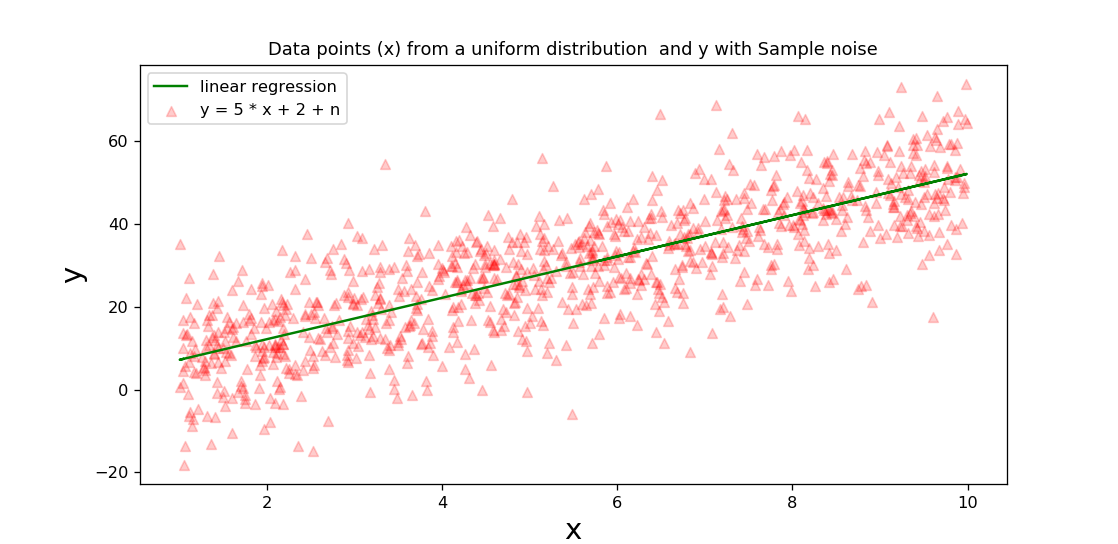

In [5]:
# 3.Perform linear regression to generate  𝑦̂  , an approximation of  𝑦 , using  𝑥  and  𝑦′ . 
x1 = x[:, None]
y1 = y[:, None]

reg = LinearRegression().fit(x1,y1)
y_reg = reg.predict(x1)

# Plot  𝑦̂   on top of the plot from question 2.
f = plt.figure()
plt.scatter(x,y,marker='^',color='red',label='y = 5 * x + 2 + n', alpha=0.2)
plt.plot(x, y_reg,color='green',label='linear regression',)
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.legend(loc="upper left")
plt.title("Data points (x) from a uniform distribution  and y with Sample noise", fontsize=11)
plt.show()

In [6]:
# 4.What is the equation for the regression line (to two decimal places)? 
# (See .coef_ and .intercept_ attributes in LinearRegression.) 
# The result should be close to, but not equal to, the line from question 1.
print('coefficient: {}, intercept: {}\n'.format(reg.coef_[0][0], reg.intercept_[0]))
print('''A linear regression line has an equation of the form Y = a + bX, 
where X is the explanatory variable and Y is the dependent variable. 
The slope of the line is b, and a is the intercept (the value of y when x = 0)\n''')
equation = x * reg.coef_[0] + reg.intercept_
equation

coefficient: 4.992692367871634, intercept: 2.231786081775194

A linear regression line has an equation of the form Y = a + bX, 
where X is the explanatory variable and Y is the dependent variable. 
The slope of the line is b, and a is the intercept (the value of y when x = 0)



array([31.09933051, 46.37463683, 49.41528189,  7.79170434, 33.40753024,
       38.11606332, 32.77697693,  8.1120162 , 11.92659622, 24.41625314,
       36.31288324, 20.17461765, 45.29734174, 19.16891593, 20.9841714 ,
       51.51452724, 49.0296199 , 30.79619194, 30.70205542, 22.80069881,
       28.40345548, 47.78761253, 18.2555142 , 35.96320861, 19.15792015,
       32.01747049, 39.32991771, 13.78141613, 27.95396446, 13.82033865,
       34.61931309, 30.87816896, 38.92555153, 38.29238275,  8.20622987,
       42.76983526, 39.68263593, 30.01287498,  7.52914287, 15.21220608,
       14.73842567, 24.73384973,  9.79835763, 44.23213349, 15.87897926,
       36.02249298, 49.74859386, 51.55532198, 11.28623252, 19.18879373,
       37.53001043, 34.58112213, 46.0310567 , 17.09598419, 29.83361681,
       24.90743298, 21.36531254, 41.13228305, 35.94378194, 37.96923026,
       26.15436273, 33.19591751, 43.01935041, 18.66554237, 13.22942445,
       35.70510709, 15.90627041, 13.12570415, 33.91369763, 29.49

In [7]:
# 5.Compute the  𝑅2  score using LinearRegression.score().

R2 = r2_score(y, y_reg)
print('R^2 (coefficient of determination) regression score function is {}'.format(R2))

R^2 (coefficient of determination) regression score function is 0.639763497809059


In [9]:
# 6.If we instead sampled noise  𝑛  from N(0,36)  in question 2, 
x
n = np.random.uniform(0,6,1000)
y_new  = 5 * x + 2 + n
x1= x[:, None]
y1 = y_new[:, None]
reg = LinearRegression().fit(x1,y1)
y_reg = reg.predict(x1)

# what  𝑅2  score would we get? Why?
R2_2 = r2_score(y1, y_reg)
print('R^2 (coefficient of determination) regression score function is {}'.format(R2_2))
print('''there is a negative R^2 coefficient. I guess This  arised because
    the prediction that have been compared to the corresponding outcome 
    have not been derived from a model-fitting procedure using those data''')

R^2 (coefficient of determination) regression score function is 0.9829589165517212
there is a negative R^2 coefficient. I guess This  arised because
    the prediction that have been compared to the corresponding outcome 
    have not been derived from a model-fitting procedure using those data


# Part 2: Anomalous Data

**Questions:**
  7. Load the data in *lin_reg_data.csv* to a pandas data frame, and perform a linear regression on the x and y columns. Print the intercept, coefficient, and $R^2$ values.
  8. Plot the residuals for the regression performed on the all rows of the data frame. What do you see?
  9. Plot a scatter plot of the x and y values, with the regression line on top. What do you see?
  10. How would you improve the linear regression? What would be better intercept and coefficient values? Plot another scatter plot of the x and y values with this improved linear regression line on top.

In [11]:
# 7.Load the data in lin_reg_data.csv to a pandas data frame,

df = pd.read_csv(r'lin_reg.csv')
# display(df.describe())
# display(df.info())

# and perform a linear regression  on the x and y columns.
x = df.x
y = df.y

xp, yp = x[:, None], y[:, None]
reg = LinearRegression().fit(xp,yp)
y_reg = reg.predict(xp)
# Print the intercept, coefficient, and  𝑅2  values.
R21 = r2_score(yp, y_reg)
print('R^2 (coefficient of determination) regression score function is {}\n'.format(R21))
print('coefficient: {}, intercept: {}\n'.format(reg.coef_[0][0], reg.intercept_[0]))

R^2 (coefficient of determination) regression score function is 0.0016777473401009546

coefficient: 1.6322376063688508, intercept: 23.79282576533953



In [12]:
%matplotlib inline

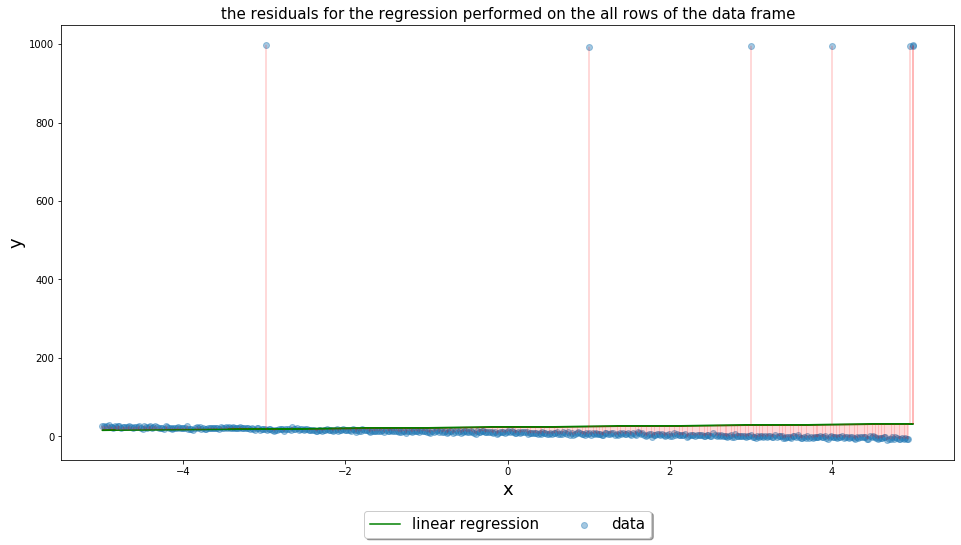

In [18]:
%matplotlib inline
# 8.Plot the residuals for the regression performed on the all rows of the data frame. 
f, ax =  plt.subplots(figsize=(16, 8))
ax.scatter(xp, yp, alpha=0.4, label='data')
ax.plot(xp, y_reg, '-g', label='linear regression')
for i in range(len(xp)):
        lineX = (xp[i], xp[i]) # same X
        lineY = (yp[i], y_reg[i]) # different Y
        plt.plot(lineX, lineY, color = 'r', linewidth = 0.3)
plt.ylabel('y',fontsize=18)
plt.xlabel('x',fontsize=18)

plt.title("the residuals for the regression performed on the all rows of the data frame", fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fontsize=15,
          fancybox=True, shadow=True, ncol=3)
plt.show()

In [14]:
# # # What do you see?
print('''i see that on a plot there are some outliers and linear regression did not include them
also the linear regression is not well fits the data''')

i see that on a plot there are some outliers and linear regression did not include them
also the linear regression is not well fits the data


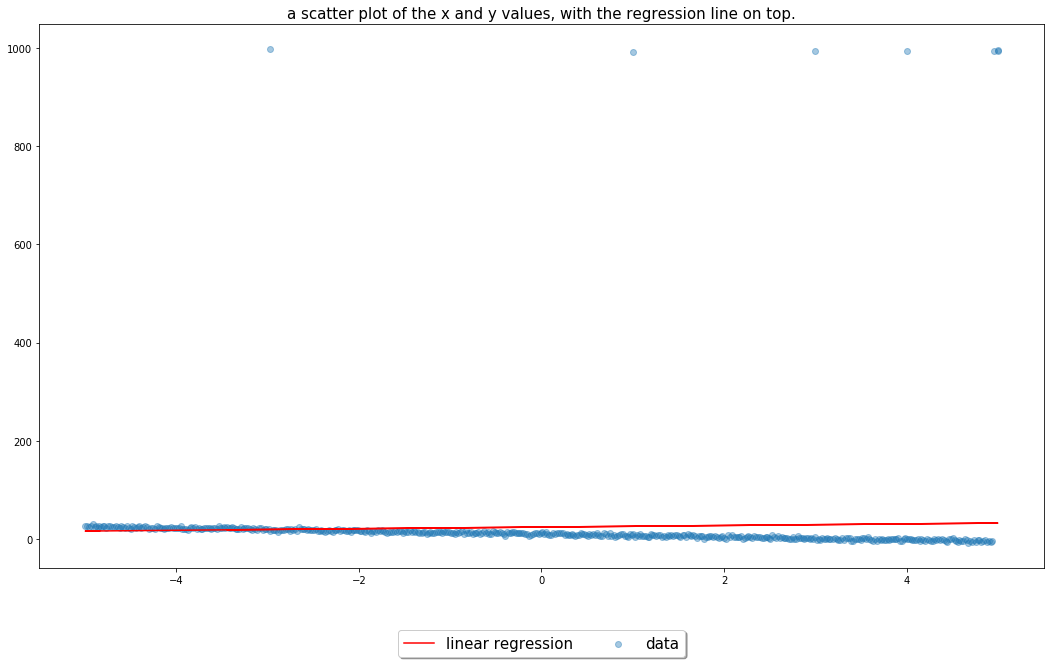

In [15]:
# 9.Plot a scatter plot of the x and y values, with the regression line on top.
coef = reg.coef_[0][0]
intercept = reg.intercept_[0]
y_2 = (coef)*xp  + intercept

f, ax =  plt.subplots(figsize=(18, 10))
ax.scatter(xp, yp, alpha=0.4, label='data')
ax.plot(xp, y_2, 'r', label='linear regression',alpha=1)
plt.title("a scatter plot of the x and y values, with the regression line on top.", fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fontsize=15,
          fancybox=True, shadow=True, ncol=3)
plt.show()

Outliers spoil the data. 
To  minimize the influence of outliers it is good to try to low the coefficient value


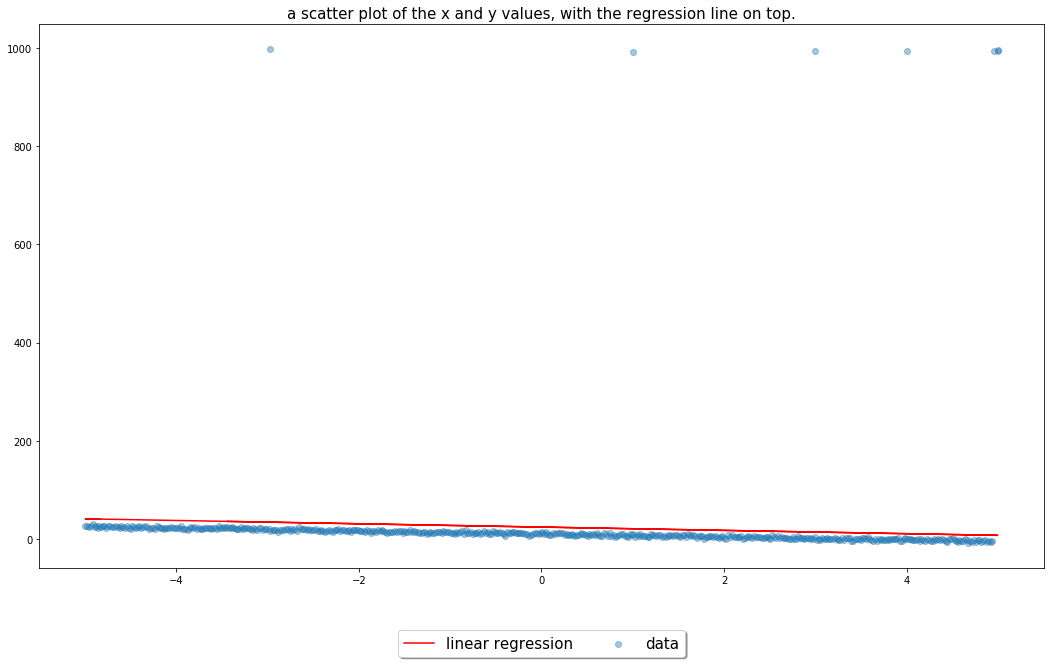

In [17]:
# 10.How would you improve the linear regression? 
print('''Outliers spoil the data. 
To  minimize the influence of outliers it is good to try to low the coefficient value''')
# What would be better intercept and coefficient values? 
residuls = yp - y_reg
MSE = np.mean(residuls)

y_2 = (coef-5)*xp  + intercept  #!!! lowing   coef on const=5, intercept is the same

# Plot another scatter plot of the x and y values with this improved linear regression line on top.
f, ax =  plt.subplots(figsize=(18, 10))
ax.scatter(xp, yp, alpha=0.4, label='data')
ax.plot(xp, y_2, '-r', label='linear regression')
plt.title("a scatter plot of the x and y values, with the regression line on top.", fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fontsize=15,
          fancybox=True, shadow=True, ncol=3)
plt.show()